# Statistics Foundations

## Data Exercises

For these exercises, load the charity_donation data set via the peopleanalyticsdata package, or download it from the [internet](http://peopleanalytics-regression-book.org/data/charity_donation.csv). This data set contains information on a sample of individuals who made donations to a nature charity.

In [1]:
# import peopleanalyticsdata package
import peopleanalyticsdata as pad
import pandas as pd

In [2]:
# see a list of data sets
pad.list_sets()

['charity_donation',
 'employee_survey',
 'health_insurance',
 'job_retention',
 'managers',
 'politics_survey',
 'salespeople',
 'soccer',
 'sociological_data',
 'speed_dating',
 'ugtests',
 'employee_performance',
 'learning',
 'graduates',
 'promotion',
 'recruiting']

In [3]:
df = pad.charity_donation()
df.head()

,n_donations,total_donations,time_donating,recent_donation,last_donation,gender,reside,age
0,2,310,27,0,4,M,Urban Domestic,29
1,3,1200,22,0,6,M,Rural Domestic,41
2,3,1200,37,1,11,M,Urban Domestic,77
3,2,760,19,1,1,F,Overseas,66
4,6,2540,37,0,11,M,Urban Domestic,26


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   n_donations      354 non-null    int64 
 1   total_donations  354 non-null    int64 
 2   time_donating    354 non-null    int64 
 3   recent_donation  354 non-null    int64 
 4   last_donation    354 non-null    int64 
 5   gender           354 non-null    object
 6   reside           354 non-null    object
 7   age              354 non-null    int64 
dtypes: int64(6), object(2)
memory usage: 22.2+ KB


### 1. Calculate the mean `total_donations` from the data set

In [4]:
df['total_donations'].mean()

2350.141242937853

In [61]:
df.describe(include='all')

,n_donations,total_donations,time_donating,recent_donation,last_donation,gender,reside,age
count,354.000000,354.000000,354.000000,354.000000,354.000000,354,354,354.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,NaN
top,NaN,NaN,NaN,NaN,NaN,F,Rural Domestic,NaN
freq,NaN,NaN,NaN,NaN,NaN,203,133,NaN
mean,5.751412,2350.141243,33.923729,0.234463,6.067797,NaN,NaN,46.997175
std,5.445097,2496.578561,13.600006,0.424263,3.792184,NaN,NaN,15.614604
min,2.000000,310.000000,15.000000,0.000000,1.000000,NaN,NaN,19.000000
25%,2.000000,760.000000,23.000000,0.000000,4.000000,NaN,NaN,33.000000
50%,4.000000,1650.000000,30.000000,0.000000,6.000000,NaN,NaN,47.000000
75%,7.000000,2990.000000,43.000000,0.000000,11.000000,NaN,NaN,57.000000


### 2. Calculate the sample variance for total_donation and convert this to a population variance.

In [15]:
var_total_donation_sample = df['total_donations'].var() # normalized by N-1 by default (sample)
var_total_donation_popul  = df['total_donations'].var(ddof=0)

print(f"The sample variance of the `total_donation` equals {var_total_donation_sample:.2f} while the population variance equals {var_total_donation_popul:.2f}")
print(f"By using the equation Var_p = (n-1)/n Var_s, we obtain for the population variance {(1 - 1/len(df)) * var_total_donation_sample:.2f}")

The sample variance of the `total_donation` equals 6232904.51 while the population variance equals 6215297.44
By using the equation Var_p = (n-1)/n Var_s, we obtain for the population variance 6215297.44


### 3.Calculate the sample standard deviation for total_donations and verify that it is the same as the square root of the sample variance.

In [17]:
print(f"The sample standard deviation equals {df['total_donations'].std(ddof=1):.2f} while the square root of the sample variance equals {var_total_donation_sample**.5:.2f}")

The sample standard deviation equals 2496.58 while the square root of the sample variance equals 2496.58


### 4. Calculate the sample correlation between total_donations and time_donating. By using an appropriate hypothesis test, determine if these two variables are independent in the overall population.

In [18]:
df[['total_donations', 'time_donating']].corr()

,total_donations,time_donating
total_donations,1.000000,0.616484
time_donating,0.616484,1.000000


In [38]:
# more precise estimation of the correlation using scipy.stats
from scipy import stats
r, p = stats.pearsonr(df['total_donations'], df['time_donating'])

print(f"Correlation coefficient r = {r:3.2f}, with P value = {p:.5f}")

Correlation coefficient r = 0.62, with P value = 0.00000


<AxesSubplot:xlabel='total_donations', ylabel='time_donating'>

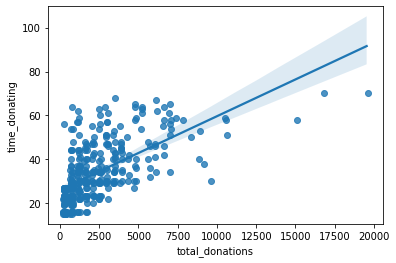

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.regplot(
    x='total_donations',
    y='time_donating',
    data=df,
    x_jitter=100,
)

The null hypothesis is that there is no correlation between variables. If the H0 were true, what is the chance that 354 randomly picked subjects would have an $r$ greater than 0.62 or less than -0.62?

In [37]:
# confirmation using pingouin
import pingouin as pg
pg.corr(x=df['total_donations'], y=df['time_donating'])

,n,r,CI95%,p-val,BF10,power
pearson,354,0.616484,"[0.55, 0.68]",1.953668e-38,1.456e+35,1.0


### 5. Calculate the mean and the standard error of the mean for the first 20 entries of total_donations

In [41]:
mean_total_donation_20 = df.loc[:19, 'total_donations'].mean()
sem_total_donation_20  = df.loc[:19, 'total_donations'].sem()

print(f"The mean of the first 20 entries of `total donations` = {mean_total_donation_20:.2f} and the SE = {sem_total_donation_20:.2f}")

The mean of the first 20 entries of `total donations` = 1851.00 and the SE = 315.09


### 6. Calculate the mean and the standard error of the mean for the first 50 entries of total_donations. Verify that the standard error is less than in Exercise 5.

In [42]:
mean_total_donation_50 = df.loc[:49, 'total_donations'].mean()
sem_total_donation_50  = df.loc[:49, 'total_donations'].sem()

print(f"The mean of the first 50 entries of `total donations` = {mean_total_donation_50:.2f} and the SE = {sem_total_donation_50:.2f}")
print(f"Is the standard error less than with 20 entries? {sem_total_donation_50 < sem_total_donation_20}")

The mean of the first 50 entries of `total donations` = 2026.40 and the SE = 240.75
Is the standard error less than with 20 entries? True


### 7. By using an appropriate hypothesis test, determine if the mean age of those who made a recent donation is different from those who did not.

In [43]:
df['recent_donation'].unique()

array([0, 1], dtype=int64)

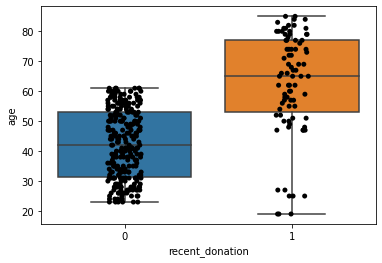

In [46]:
sns.boxplot(
    x='recent_donation',
    y='age',
    data=df
)

sns.stripplot(
    x='recent_donation',
    y='age',
    data=df,
    color='black',
);

In [57]:
# we first check for equal variance, although it doesn't look True on the plot
pg.homoscedasticity(
    data=df,
    dv='age', # long format dataframe
    group='recent_donation'
)

,W,pval,equal_var
levene,14.446737,0.00017,False


In [58]:
# because the variances aren't equal, we use the Welch's t-test
ix = df['recent_donation'] == 1

pg.ttest(
    x=df[ix] ['age'],
    y=df[~ix]['age'],
    correction=True,
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.207145,105.150578,two-sided,2.069049e-17,"[16.51, 24.48]",1.577989,2.514e+18,1.0


In [84]:
pg.ttest(
    x=df[ix] ['age'],
    y=df[~ix]['age'],
    correction='auto', # automatically uses Welch T-test when the sample sizes are unequal (default)
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,10.207145,105.150578,two-sided,2.069049e-17,"[16.51, 24.48]",1.577989,2.514e+18,1.0


### 8. By using an appropriate hypothesis test, determine if there is a difference in whether or not a recent donation was made according to where people reside.

In [60]:
df['reside'].unique()

array(['Urban Domestic', 'Rural Domestic', 'Overseas'], dtype=object)

In [77]:
table = pd.crosstab(
    df['reside'],
    df['recent_donation'],
)

table

recent_donation,0,1
reside,,
Overseas,101,14
Rural Domestic,88,45
Urban Domestic,82,24


There are more than 3 categories and the outcome is a count, therefore it's a task for Chi2

In [76]:
df['reside'].value_counts()

Rural Domestic    133
Overseas          115
Urban Domestic    106
Name: reside, dtype: int64

If `reside` is not a good predictor for `recent_donation`, we should expect the same ratios accross the target classes.

In [74]:
expected, observed, stats = pg.chi2_independence(
    x='reside',
    y='recent_donation',
    data=df
)

expected

recent_donation,0,1
reside,,
Overseas,88.036723,26.963277
Rural Domestic,101.816384,31.183616
Urban Domestic,81.146893,24.853107


In [75]:
observed

recent_donation,0,1
reside,,
Overseas,101,14
Rural Domestic,88,45
Urban Domestic,82,24


In [72]:
pg.print_table(stats)

test                  lambda    chi2    dof    pval    cramer    power
------------------  --------  ------  -----  ------  --------  -------
pearson                1.000  16.176  2.000   0.000     0.214    0.959
cressie-read           0.667  16.314  2.000   0.000     0.215    0.960
log-likelihood         0.000  16.777  2.000   0.000     0.218    0.965
freeman-tukey         -0.500  17.307  2.000   0.000     0.221    0.969
mod-log-likelihood    -1.000  18.019  2.000   0.000     0.226    0.975
neyman                -2.000  20.118  2.000   0.000     0.238    0.986



Very low p-values indeed, the site of residence qualifies as a good predictor for the people who made a recent donation.

In [83]:
from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table)

print(f"chi² = {chi2:.3f}")
print(f"P value = {p:.5f}")
print(f"with {dof} degrees of freedom")

print("expected counts are:")
print(expected)

chi² = 16.176
P value = 0.00031
with 2 degrees of freedom
expected counts are:
[[ 88.03672316  26.96327684]
 [101.81638418  31.18361582]
 [ 81.14689266  24.85310734]]


### 9. By using an appropriate hypothesis test, determine if the age of those who have recently donated is at least 10 years older than those who have not recently donated in the population.

We are trying to establish if $\bar{x_1} - 10 > \bar{x_0}$ in the population. Alternatively stated, we are testing if $\overline{x_1 - 10} > \bar{x_0}$ in the population, so we are doing a _t_-test in our sample to compare $x1 - 10$ with $x0$. Our null hypothesis is that there is no difference between the means of $x1 - 10$ and $x0$. Our alternative hypothesis is that the mean of $x1 - 10$ is greater than the mean of $x0$. This requires a one sided t-test.

In [85]:
pg.ttest(
    x=df[ix] ['age'] - 10,
    y=df[~ix]['age'],
    alternative='greater' #`greater` tests against the alternative hypothesis that the mean of x is greater than the mean of y
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,5.226802,105.150578,greater,4.403095e-07,"[7.16, inf]",0.808046,8.275e+04,1.0


The p-value of this test meets an alpha standard of 0.001 and this confirms the alternate hypothesis that those who donated are at least ten years older than those who did not.

In [98]:
# alternatively we can use ttest_ind method from scipy.stats
from scipy import stats

stats.ttest_ind(
    df[ix] ['age'] - 10,
    df[~ix]['age'],
    equal_var=False,
    alternative='greater', # defines the alternative hypothesis
)

Ttest_indResult(statistic=5.2268021732859635, pvalue=4.4030947228348503e-07)

In [97]:
stats.ttest_ind(
    df[ix] ['age'],
    df[~ix]['age'] + 10,
    equal_var=False,
    alternative='greater', # defines the alternative hypothesis
)

Ttest_indResult(statistic=5.2268021732859635, pvalue=4.4030947228348503e-07)

In [93]:
# using statsmodels
import statsmodels.api as sm

sm.stats.ttest_ind(
    df[ix] ['age'],
    df[~ix]['age'],
    usevar='unequal',
    alternative='larger',
    value=10 # difference between the means under the null hypothesis
)

(5.2268021732859635, 4.4030947228348514e-07, 105.15057759463707)

### 10. By using an appropriate hypothesis test, determine if the average donation amount is at least 10 dollars higher for those who recently donated versus those who did not. Retest for 20 dollars higher

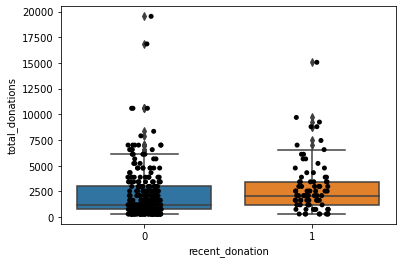

In [106]:
sns.boxplot(
    x='recent_donation',
    y='total_donations',
    data=df
)

sns.stripplot(
    x='recent_donation',
    y='total_donations',
    data=df,
    color='black',
);

In [94]:
pg.ttest(
    x=df[ix] ['total_donations'] - 10,
    y=df[~ix]['total_donations'],
    alternative='greater' #`greater` tests against the alternative hypothesis that the mean of x is greater than the mean of y
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.411699,130.344073,greater,0.008636,"[241.51, inf]",0.311292,4.269,0.79722


In [103]:
pg.ttest(
    x=df[ix] ['total_donations'] - 20,
    y=df[~ix]['total_donations'],
    alternative='greater' #`greater` tests against the alternative hypothesis that the mean of x is greater than the mean of y
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.380434,130.344073,greater,0.00937,"[231.51, inf]",0.307256,3.979,0.788037


In [104]:
pg.ttest(
    x=df[ix] ['total_donations'] - 30,
    y=df[~ix]['total_donations'],
    alternative='greater' #`greater` tests against the alternative hypothesis that the mean of x is greater than the mean of y
)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,2.349169,130.344073,greater,0.010159,"[221.51, inf]",0.303221,3.713,0.778614
